<a href="https://colab.research.google.com/github/Mtab-cyber/PCSE22-13/blob/Collab-Commit/Analysis_of_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from __future__ import division
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
import string
import re
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Copying the data into the dataframe

col_names = ["target", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1",names=col_names)
df = df.drop(['ids','date','flag','user'],axis=1)
df['target']=df['target'].replace(4,'Positive')
df['target']=df['target'].replace(0,'Negative')
df.rename(columns = {'target':'Analysis'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Analysis  1600000 non-null  object
 1   text      1600000 non-null  object
dtypes: object(2)
memory usage: 24.4+ MB


In [ ]:
tweets = pd.read_csv('/content/drive/MyDrive/flag1.csv')
tweets = tweets.reset_index(drop=True)
tweets = tweets.drop(columns=tweets.columns[0],axis=1)
text_df = tweets.sample(n=5000)#df.sample(n=10000)
#text_df = df.iloc[1000:2000,0:2]
#text_df.info()

In [ ]:
text_df.head()

,text,Subjectivity,Polarity,Analysis
354616,bed nowtomorrow last day pit camp,0.066667,0.000000,Neutral
668169,everybody left bethany left,0.000000,0.000000,Neutral
1551989,kathyxxxx im serious table little girl use cov...,0.583333,-0.260417,Negative
760669,hotpinkmarker love show really good watch gonn...,0.600000,0.937500,Positive
969469,ryanshaw im covering friend joeys video blog i...,1.000000,0.000000,Neutral


In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'].values.astype('U'))
#1.13

In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("Frist 20 features:\n{}".format(feature_names[:20]))

Number of features: 40467

Frist 20 features:
['aa', 'aa dual', 'aaa', 'aaa new', 'aaaaaah', 'aaaaaah cant', 'aaaaand', 'aaaaand sun', 'aaaages', 'aaaages ago', 'aaaargh', 'aaaghhrr', 'aaaghhrr want', 'aaah', 'aaah ive', 'aaaww', 'aaaww congrats', 'aah', 'aah di', 'aampe']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X = text_df['text'].values.astype('U')
Y = text_df['Analysis']
X = vect.transform(X)
# .38

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
print("Size of x_train:",(x_train.shape))
print("Size of x_test:",(x_test.shape))
print("Size of y_train:",(y_train.shape))
print("Size of y_test:",(y_test.shape))

Size of x_train: (4000, 40467)
Size of x_test: (1000, 40467)
Size of y_train: (4000,)
Size of y_test: (1000,)


In [ ]:
x_train

<4000x40467 sparse matrix of type '<class 'numpy.int64'>'
	with 55218 stored elements in Compressed Sparse Row format>

In [ ]:
import collections
dict ={}

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1600000)
logreg.fit(x_train,y_train)
logres_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logres_pred, y_test)
print(logreg_acc)
dict['LogesticRegression'] = (logreg_acc*100)
print(confusion_matrix(y_test,logres_pred))
print("\n")
print(classification_report(y_test,logres_pred))

0.786
[[115  71  31]
 [  5 319   9]
 [ 16  82 352]]


              precision    recall  f1-score   support

    Negative       0.85      0.53      0.65       217
     Neutral       0.68      0.96      0.79       333
    Positive       0.90      0.78      0.84       450

    accuracy                           0.79      1000
   macro avg       0.81      0.76      0.76      1000
weighted avg       0.81      0.79      0.78      1000



In [ ]:
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(x_train.toarray(), y_train)
# nb_pred = nb.predict(x_test.toarray())
# acc = accuracy_score(nb_pred, y_test)
# print(acc)
# dict['Naive Bayes Gausian'] = acc*100
# print("\n")
# print(confusion_matrix(y_test,nb_pred))
# print("\n")
# print(classification_report(y_test,nb_pred))

In [ ]:
#SVM on sigmoid Kernel
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
acc = accuracy_score(svm_pred, y_test)
print(acc)
dict['Support Vector Machine Sigmoid'] = acc*100
print("\n")
print(confusion_matrix(y_test,svm_pred))
print("\n")
print(classification_report(y_test,svm_pred))

0.753


[[100  82  35]
 [  3 327   3]
 [ 18 106 326]]


              precision    recall  f1-score   support

    Negative       0.83      0.46      0.59       217
     Neutral       0.63      0.98      0.77       333
    Positive       0.90      0.72      0.80       450

    accuracy                           0.75      1000
   macro avg       0.79      0.72      0.72      1000
weighted avg       0.79      0.75      0.75      1000



In [ ]:
#SVM on rbf Kernel
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
acc = accuracy_score(svm_pred, y_test)
print(acc)
dict['Support Vector Machine RBF'] = acc*100
print("\n")
print(confusion_matrix(y_test,svm_pred))
print("\n")
print(classification_report(y_test,svm_pred))

0.706


[[ 64  64  89]
 [  0 264  69]
 [  4  68 378]]


              precision    recall  f1-score   support

    Negative       0.94      0.29      0.45       217
     Neutral       0.67      0.79      0.72       333
    Positive       0.71      0.84      0.77       450

    accuracy                           0.71      1000
   macro avg       0.77      0.64      0.65      1000
weighted avg       0.74      0.71      0.68      1000



In [ ]:
#SVM on linear Kernel
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
acc = accuracy_score(svm_pred, y_test)
print(acc)
dict['Support Vector Machine Linear'] = acc*100
print("\n")
print(confusion_matrix(y_test,svm_pred))
print("\n")
print(classification_report(y_test,svm_pred))

0.792


[[129  61  27]
 [  8 320   5]
 [ 27  80 343]]


              precision    recall  f1-score   support

    Negative       0.79      0.59      0.68       217
     Neutral       0.69      0.96      0.81       333
    Positive       0.91      0.76      0.83       450

    accuracy                           0.79      1000
   macro avg       0.80      0.77      0.77      1000
weighted avg       0.81      0.79      0.79      1000



In [ ]:
#SVM on polynomial Kernel
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
acc = accuracy_score(svm_pred, y_test)
print(acc)
dict['Support Vector Machine Poly'] = acc*100
print("\n")
print(confusion_matrix(y_test,svm_pred))
print("\n")
print(classification_report(y_test,svm_pred))

0.357


[[  0 214   3]
 [  0 333   0]
 [  0 426  24]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       217
     Neutral       0.34      1.00      0.51       333
    Positive       0.89      0.05      0.10       450

    accuracy                           0.36      1000
   macro avg       0.41      0.35      0.20      1000
weighted avg       0.51      0.36      0.22      1000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier as DTC
des_tree = DTC(criterion = 'entropy')
des_tree.fit(x_train, y_train)
dtc_pred = des_tree.predict(x_test)
acc = accuracy_score(dtc_pred, y_test)
print(acc)
dict['Decision Tree Classification'] = acc*100
print("\n")
print(confusion_matrix(y_test,dtc_pred))
print("\n")
print(classification_report(y_test,dtc_pred))

0.822


[[133  39  45]
 [ 12 313   8]
 [ 26  48 376]]


              precision    recall  f1-score   support

    Negative       0.78      0.61      0.69       217
     Neutral       0.78      0.94      0.85       333
    Positive       0.88      0.84      0.86       450

    accuracy                           0.82      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.82      0.82      0.82      1000



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(n_estimators=5, criterion='entropy')
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
acc = accuracy_score(rfc_pred, y_test)
print(acc)
dict['RandomForestClassifier'] = acc*100
print("\n")
print(confusion_matrix(y_test,rfc_pred))
print("\n")
print(classification_report(y_test,rfc_pred))

0.764


[[118  58  41]
 [  9 317   7]
 [ 35  86 329]]


              precision    recall  f1-score   support

    Negative       0.73      0.54      0.62       217
     Neutral       0.69      0.95      0.80       333
    Positive       0.87      0.73      0.80       450

    accuracy                           0.76      1000
   macro avg       0.76      0.74      0.74      1000
weighted avg       0.78      0.76      0.76      1000



In [ ]:
#Linear Regression is a type of classification used for Regression problem.

# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# lr_y= label_encoder.fit_transform(y_train)
# test_y = label_encoder.fit_transform(y_test)

In [ ]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(x_train, lr_y)
# # lr_pred = lr.predict(x_test)
# print(lr.score(x_test, test_y))

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x_train)
# X_train = scaler.transform(x_train)
# X_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
acc = accuracy_score(knn_pred, y_test)
print(acc)
dict['KNN'] = acc*100
print("\n")
print(confusion_matrix(y_test,knn_pred))
print("\n")
print(classification_report(y_test,knn_pred))

0.338


[[ 16 201   0]
 [ 37 296   0]
 [ 20 404  26]]


              precision    recall  f1-score   support

    Negative       0.22      0.07      0.11       217
     Neutral       0.33      0.89      0.48       333
    Positive       1.00      0.06      0.11       450

    accuracy                           0.34      1000
   macro avg       0.52      0.34      0.23      1000
weighted avg       0.61      0.34      0.23      1000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
acc = accuracy_score(gbc_pred, y_test)
print(acc)
dict['Gradient Boosting Classifier'] = acc*100
print("\n")
print(confusion_matrix(y_test,gbc_pred))
print("\n")
print(classification_report(y_test,gbc_pred))

0.449


[[  0   0 217]
 [  0   0 333]
 [  0   1 449]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       217
     Neutral       0.00      0.00      0.00       333
    Positive       0.45      1.00      0.62       450

    accuracy                           0.45      1000
   macro avg       0.15      0.33      0.21      1000
weighted avg       0.20      0.45      0.28      1000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(dict)

{'LogesticRegression': 78.60000000000001, 'Support Vector Machine Sigmoid': 75.3, 'Support Vector Machine RBF': 70.6, 'Support Vector Machine Linear': 79.2, 'Support Vector Machine Poly': 35.699999999999996, 'Decision Tree Classification': 82.19999999999999, 'RandomForestClassifier': 76.4, 'KNN': 33.800000000000004, 'Gradient Boosting Classifier': 44.9}


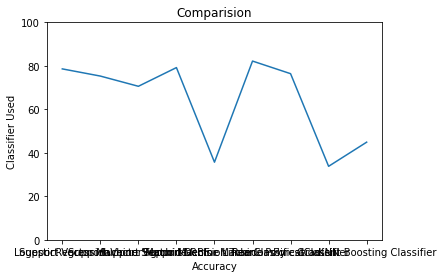

In [ ]:
import matplotlib.pylab as plot

data = dict.items()
# data = sorted(data)

x, y = zip(*data)

plot.plot(x, y)
plot.xlabel('Accuracy')
plot.ylabel('Classifier Used')
plot.title('Comparision')
plot.ylim(0,100)
plot.show()